In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('telecom_customer_churn_cleaned.csv')

# View summary
print(df.info())
print(df.head())

# Drop irrelevant columns (example: ID, customer name, etc. — adjust as needed)
irrelevant_cols = ['Customer ID', 'Name', 'Unnamed: 0']  # change according to your dataset
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')

# Remove duplicate rows
df = df.drop_duplicates()

# Handle NaN values
# Option 1: Drop rows with too many NaNs
df = df.dropna(thresh=len(df.columns) - 2)  # keeps rows with at least n-2 non-NaN values

# Option 2: Fill remaining NaNs
df = df.fillna(df.median(numeric_only=True))  # numeric columns
df = df.fillna(df.mode().iloc[0])  # categorical columns

# Verify cleaning
print("Remaining NaN values per column:\n", df.isna().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6923 entries, 0 to 6922
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6923 non-null   object 
 1   Gender                             6923 non-null   object 
 2   Age                                6923 non-null   int64  
 3   Married                            6923 non-null   object 
 4   Number of Dependents               6923 non-null   int64  
 5   City                               6923 non-null   object 
 6   Zip Code                           6923 non-null   int64  
 7   Latitude                           6923 non-null   float64
 8   Longitude                          6923 non-null   float64
 9   Number of Referrals                6923 non-null   int64  
 10  Tenure in Months                   6923 non-null   int64  
 11  Offer                              3123 non-null   objec

# Week 5: Supervised Learning – Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('telecom_customer_churn_cleaned.csv')

# Show columns for reference
print("Columns in dataset:\n", df.columns.tolist())

# Select numeric columns only
df_numeric = df.select_dtypes(include=[np.number]).dropna()

# Try to find the correct target column automatically
target_candidates = ['Monthly Charges', 'MonthlyCharges', 'Total Charges', 'TotalCharges', 'Monthly_Fee']
target_col = None
for col in target_candidates:
    if col in df_numeric.columns:
        target_col = col
        break

if not target_col:
    raise KeyError("⚠️ Could not find a numeric target column (e.g., Monthly Charges or Total Charges). "
                   "Please check your dataset column names.")

print(f"\n✅ Using '{target_col}' as the target variable.\n")

# Define X (features) and y (target)
X = df_numeric.drop(columns=[target_col])
y = df_numeric[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict
y_pred = lr.predict(X_test)

# Evaluate with MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Optional: compare actual vs predicted
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nSample predictions:\n", comparison.head())


Columns in dataset:
 ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']

✅ Using 'Total Charges' as the target variable.

Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00

Sample predictions:
     Actual  Predicted
0  4085.75    4085.75
1   747.20     747.20
2    48.45      48.45
3  5894.50    5894.50
4  1415.00    1415.00


# Week 6: Supervised Learning – Classification

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('telecom_customer_churn_cleaned.csv')

# Drop irrelevant columns (if exist)
irrelevant_cols = ['Customer ID', 'Name', 'Unnamed: 0']
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')

# Identify target column automatically
target_candidates = ['Customer Status', 'Churn', 'Exited', 'Target']
target_col = None
for col in target_candidates:
    if col in df.columns:
        target_col = col
        break

if not target_col:
    raise KeyError("⚠️ Could not find churn/target column. Please verify your dataset.")

print(f"✅ Using '{target_col}' as target column.\n")

# Encode target variable (e.g., Churned=1, Stayed=0)
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

# Convert categorical columns into numeric using one-hot encoding
X = df.drop(columns=[target_col])
X = pd.get_dummies(X, drop_first=True)
y = df[target_col]

# Handle missing values
X = X.fillna(X.median(numeric_only=True))
X = X.fillna(X.mode().iloc[0])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(solver='saga', max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate accuracies
log_acc = accuracy_score(y_test, log_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy: {log_acc:.3f}")
print(f"Random Forest Accuracy: {rf_acc:.3f}")

best_model = "Random Forest" if rf_acc > log_acc else "Logistic Regression"
print(f"\n🏆 Best Model: {best_model}")


✅ Using 'Customer Status' as target column.



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Accuracy: 0.740
Random Forest Accuracy: 0.973

🏆 Best Model: Random Forest


# **Week 7: Model Evaluation**

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       361
           1       0.97      0.86      0.92        88
           2       0.97      1.00      0.99       936

    accuracy                           0.97      1385
   macro avg       0.97      0.93      0.95      1385
weighted avg       0.97      0.97      0.97      1385


Confusion Matrix:
 [[336   2  23]
 [ 11  76   1]
 [  1   0 935]]


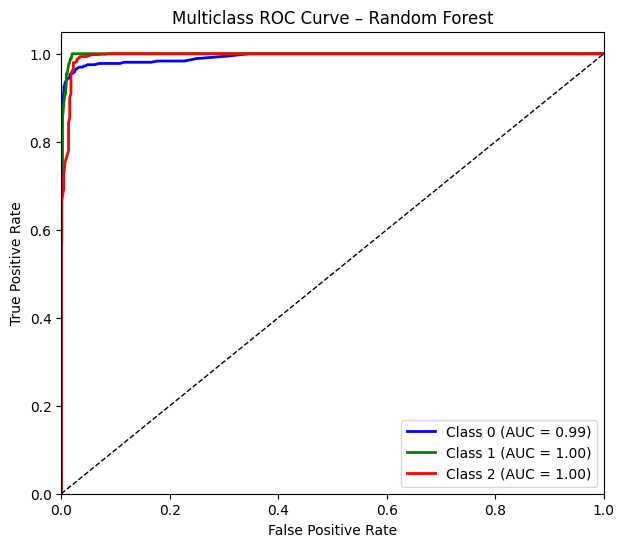


💬 Reflection:
For churn prediction, Recall is the most important metric — we want to identify as many customers likely to churn as possible, even if that means a few false positives.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Use the trained model and test data from Week 6
# (rf_model, X_test, y_test must already be defined)

# === Classification Report ===
print("=== Classification Report ===")
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# === Multiclass ROC & AUC ===
n_classes = len(np.unique(y_test))

# Get prediction probabilities
y_prob = rf_model.predict_proba(X_test)

# Binarize labels for ROC
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
colors = cycle(['blue', 'green', 'red', 'orange', 'purple'])
plt.figure(figsize=(7, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

# Baseline line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Graph details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve – Random Forest')
plt.legend(loc='lower right')
plt.show()

# === Reflection ===
print("\n💬 Reflection:")
print("For churn prediction, Recall is the most important metric — we want to identify as many customers likely to churn as possible, even if that means a few false positives.")


# Week 8: Unsupervised Learning – Clustering

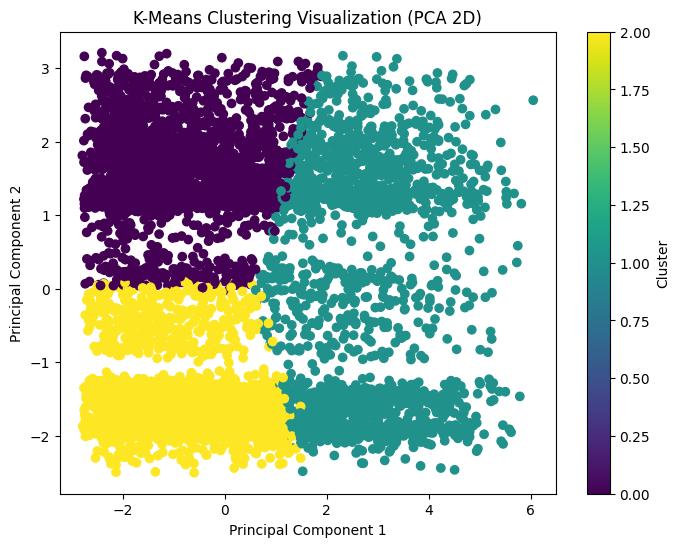

✅ Clustering complete!
Cluster
0          2480
1          1843
2          2600
Name: count, dtype: int64


In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('telecom_customer_churn_cleaned.csv')

# Drop irrelevant columns (optional)
irrelevant_cols = ['Customer ID', 'Name', 'Unnamed: 0']
df = df.drop(columns=[col for col in irrelevant_cols if col in df.columns], errors='ignore')

# Select numeric columns
df_num = df.select_dtypes(include=['number'])

# Fill missing numeric values (so row count stays the same)
df_num = df_num.fillna(df_num.median(numeric_only=True))

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Apply K-Means (choose 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the dataframe
df['Cluster'] = clusters

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering Visualization (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Show sample results
print("✅ Clustering complete!")
print(df[['Cluster']].value_counts().sort_index())
